In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Funciones algebraicas

### Creando una Función Lineal

In [1]:
def f(m,x,b):
    return m*x + b

res = 100
m = 10
b = 5

x = np.linspace(-10.0,10.0, num=res)
y = f(m,x,b)

fig, ax = plt.subplots()

ax.plot(x,y)
ax.grid()
ax.axhline(y=0,color='r')
ax.axvline(x=0, color='r')


NameError: name 'np' is not defined

## Funciones trascendentes

No pueden ser expresadas con polinomios, como las trigonometricas, para graficar se usa un parametro que se conoce aquí como la resolución, la cual permite modificar el numero de puntos a evaluar en la función, entre mayor cantidad de puntos mejor será el suavizado de la función

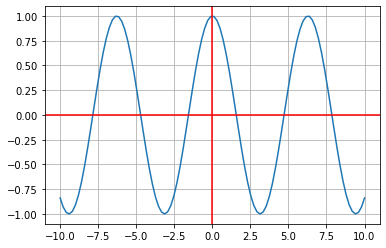

In [7]:
def f(x):
    return np.cos(x)

res = 100

x = np.linspace(-10.0,10.0, num=res)
y = f(x)

fig, ax = plt.subplots()

ax.plot(x,y)
ax.grid()
ax.axhline(y=0,color='r')
ax.axvline(x=0, color='r')


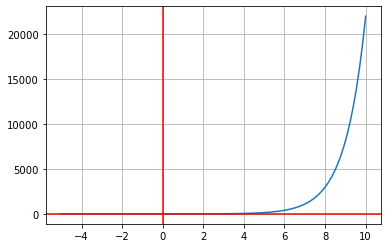

In [9]:
def f(x):
    return np.exp(x)

res = 100

x = np.linspace(-5.0,10.0, num=res)
y = f(x)

fig, ax = plt.subplots()

ax.plot(x,y)
ax.grid()
ax.axhline(y=0,color='r')
ax.axvline(x=0, color='r')

## Logaritmo

- b es la base
- n es el numero al que esta elevada la base
- x es el resultado de elevar la base b an exponente x

entonces un logaritmo te devuelve el numero al cual esta elevado la base pasandole un parametro x como resultado de haberlo elevado

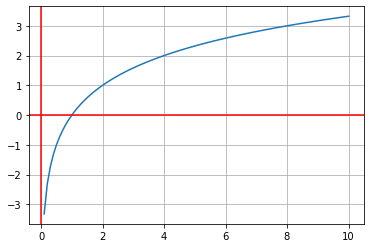

In [13]:
def f(x):
    return np.log2(x)

res = 100

x = np.linspace(0.1,10.0, num=res)
y = f(x)

fig, ax = plt.subplots()

ax.plot(x,y)
ax.grid()
ax.axhline(y=0,color='r')
ax.axvline(x=0, color='r')

### Función seccionada
Función Heaviside

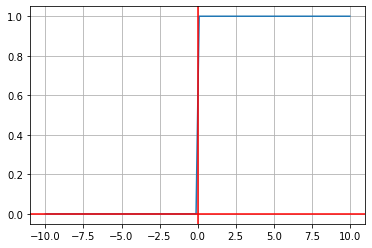

In [6]:
def H(x):
    y = np.zeros(len(x))
    for idx,x in enumerate(x):
        if x >= 0:
            y[idx] = 1.0
    return y

res = 100

x = np.linspace(-10,10.0, num=res)
y = H(x)

fig, ax = plt.subplots()

ax.plot(x,y)
ax.grid()
ax.axhline(y=0,color='r')
ax.axvline(x=0, color='r')

# Que hay detras de una Neurona

Las neuronas son una función, lo cual aplica un suma ponderada, es decir que hay una caja de entrada a la neurona que le agrega un peso, por tanto, los valores que ingresan a la neurona salen con un valor y.

Hay tambien otro parametro que sale de la neurona que es el bias.

# Funciones de activación

Nos permiten saber si la neurona esta apagada o prendida. Mas explicitamente, la función convierte los valores en basicamente dos estados, por ejemplo la función de hevisaik o función escalonada donde los valores de un dominio determinado les asigna dos posibles valores dependiendo en que datos se encuentren

# Función de coste: calcula qué tan erradas son tus predicciones

Como el error cuadratico medio, calculado con los residuos del modelo 


# Derivadas

In [ ]:
import math
from math import *
import sympy as sp

def derivada(expr):
    x = sp.Symbol('x')
    funcion = sp.Derivative(expr,  evaluate=True)
    print(f'La derivada de f(x) es:     {funcion}')

if __name__ == '__main__':
    print('\n la ecuacion debe estar en funcion de (x)')
    expr = input("Funcion a evaluar:    f(x)=")
    derivada(expr)




 la ecuacion debe estar en funcion de (x)


# Diseñando mapas: curvas de nivel

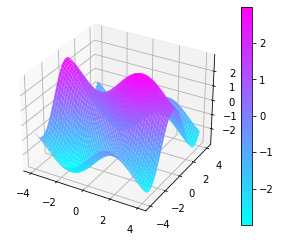

In [12]:
def z(x,y):
    return np.sin(x) + 2*np.cos(y)

res = 200
x = np.linspace(-4,4,num=res)
y = np.linspace(-4,4,num=res)

# Generar los pares coordenados

x,y = np.meshgrid(x,y)
z = z(x,y)

# Figuras y eje con su tipo de figura
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

surf = ax.plot_surface(x,y,z,cmap=cm.cool)
fig.colorbar(surf)
plt.show()


## Curvas de nivel

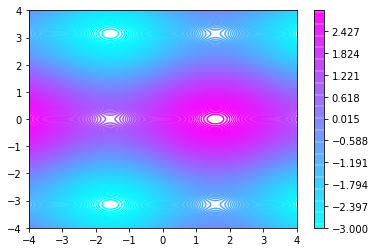

In [20]:
fig2, ax2 = plt.subplots()
# Niveles
level_map = np.linspace(np.min(z),np.max(z),num=res)
cp = ax2.contour(x,y,z,levels=level_map,cmap=cm.cool)
fig2.colorbar(cp)
plt.show()


Los niveles son planos que cortan la superficie en dos dimensiones desde el punto minimo hasta el punto maximo, sirven para representar los datos en un espacio bidimensional, así sabemos que puntos son los mas altos y que puntos son los mas bajos.

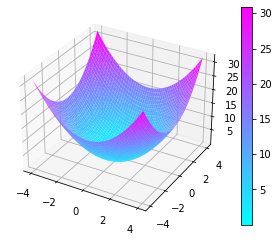

In [3]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
def f(x,y):
    return x**2 + y**2

res = 400

x = np.linspace(-4,4,res)
y = np.linspace(-4,4,res)
X,Y = np.meshgrid(x,y)

z = f(X,Y)

surf = ax.plot_surface(X,Y,z,cmap=cm.cool)
fig.colorbar(surf)
plt.show()

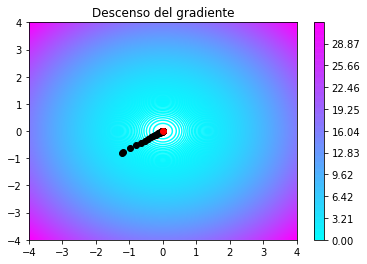

In [6]:
fig1,ax1 = plt.subplots()
level_map = np.linspace(np.min(z),np.max(z),res)
cp = ax1.contour(X,Y,z,levels=level_map,cmap=cm.cool)
fig1.colorbar(cp)
plt.title('Descenso del gradiente')
p=np.random.rand(2)* 8 - 4
plt.plot(p[0],p[1],'o',c='k')

h = 0.01
lr = 0.01

def derivate(cp, p):
    return (f(cp[0],cp[1])- f(p[0],p[1])) / h

def gradiente(p):
    grad = np.zeros(2)
    for idx, val in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h
        dp = derivate(cp, p)
        grad[idx] = dp
    return grad

for i in range(1000):
    p = p - lr*gradiente(p)
    if(i % 10 == 0):
        plt.plot(p[0],p[1],'o',c='k')
        
plt.plot(p[0],p[1],'o',c='r')
plt.show()
